<a href="https://colab.research.google.com/github/Hongjieun123/deeplearning-project/blob/master/%EC%BC%80%EB%9D%BC%EC%8A%A4(%EB%A1%9C%EC%9D%B4%ED%84%B0_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #로이터 뉴스 기사 데이터는 총 11,258개의 뉴스 기사가 
 #46개의 뉴스 카테고리로 분류되는 뉴스 기사 데이터입니다. 

 from keras.datasets import reuters
 (train_data, train_labels),(test_data, test_labels) = reuters.load_data(num_words=10000)

Using TensorFlow backend.


2113536/2110848 [==============================] - 0s 0us/step


In [13]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)

(8982,)
(2246,)
(8982,)


In [0]:
#원핫 인코딩
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for (i, sequence) in enumerate(sequences):
    results[i, sequence] = 1.
  return results

x_train = vectorize_sequences(train_data)
y_train = vectorize_sequences(test_data)

In [0]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [0]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [0]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [24]:
history = model.fit(partial_x_train, partial_y_train, epochs=3, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/3
7982/7982 [==============================] - 2s 306us/step - loss: 0.1678 - accuracy: 0.9550 - val_loss: 1.2124 - val_accuracy: 0.8110
Epoch 2/3
7982/7982 [==============================] - 2s 297us/step - loss: 0.1562 - accuracy: 0.9572 - val_loss: 1.3432 - val_accuracy: 0.8010
Epoch 3/3
7982/7982 [==============================] - 2s 295us/step - loss: 0.1485 - accuracy: 0.9565 - val_loss: 1.3933 - val_accuracy: 0.8020


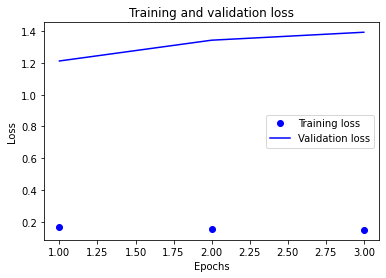

In [25]:
# 코드 3-9 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()